# About Data

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

# Import Some Modules to deal with data set

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

from keras.models import Sequential , Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Input,  Concatenate, GlobalMaxPooling2D
from keras.optimizers import Adam

#To using K-fold  cross validation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold




# Load the data set

The tf.keras.datasets module provide a few toy datasets (already-vectorized, in Numpy format) that can be used for debugging a model or creating simple code examples.

In [2]:
# load Fashion MNIST dataset
train= pd.read_csv('/content/fashion-mnist_train.csv')
test= pd.read_csv('/content/fashion-mnist_test.csv')

In [3]:
train.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]

In [4]:
print("Fashion MNIST train -  rows:",train.shape[0]," columns:", train.shape[1])
print("Fashion MNIST test -  rows:",test.shape[0]," columns:", test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


# Data Visualization

<Axes: >

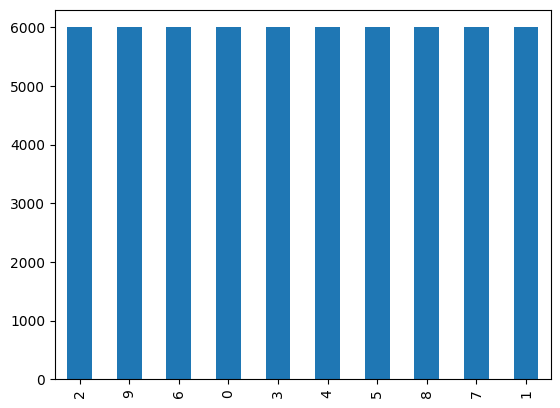

In [5]:
#train label
train.label.value_counts().plot(kind='bar')

<Axes: >

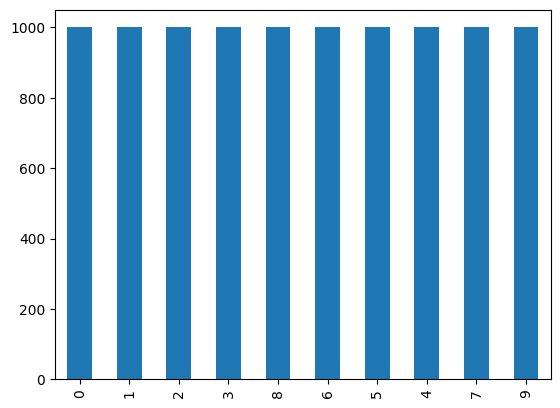

In [6]:
#test labels count
test.label.value_counts().plot(kind='bar')

#Preprocessing

Check the data for missing values 

In [7]:
#check the missing values on train data set
train.isnull().sum().sum()

0

In [8]:
#check the missing values on test data set
test.isnull().sum().sum()

0

there is no missing valued on train or test set

**Check the duplication**

In [9]:
train.duplicated().sum()

43

In [10]:
test.duplicated().sum()

1

**Remove the duplication**

In [11]:
train.drop_duplicates(inplace=True)

In [12]:
test.drop_duplicates(inplace=True)

#Split Training Data 

In [13]:
# split to features and label
data = np.asarray(train, dtype=np.float32)
X = data[:, 1:]
y = data[:, 0]

# Spilt tes Data

In [38]:
data2 = np.asarray(test, dtype=np.float32)
X_test = data[:, 1:]
y_test = data[:, 0]

# **Reshape data**

we can load the images and reshape the data arrays to have a single color channel.

In [14]:
# reshape to 28×28
X = X.reshape(-1, 28, 28)
# add padding
X = tf.pad(X, [[0, 0], [2, 2], [2, 2]])
# add the channels dimention so it will become (..., 32, 32, 1) instead of (..., 32, 32)
X = tf.expand_dims(X, axis=3, name=None).numpy()
X.shape

(59957, 32, 32, 1)

In [39]:
# reshape to 28×28
X_test = X_test.reshape(-1, 28, 28)
# add padding
X_test = tf.pad(X_test, [[0, 0], [2, 2], [2, 2]])
# add the channels dimention so it will become (..., 32, 32, 1) instead of (..., 32, 32)
X_test = tf.expand_dims(X_test, axis=3, name=None).numpy()
X_test.shape

(59957, 32, 32, 1)

# Prepare Pixel Data (Normalization)


In [15]:
X = X / 255

In [40]:
X_test = X_test / 255

# Visualize Some of Images


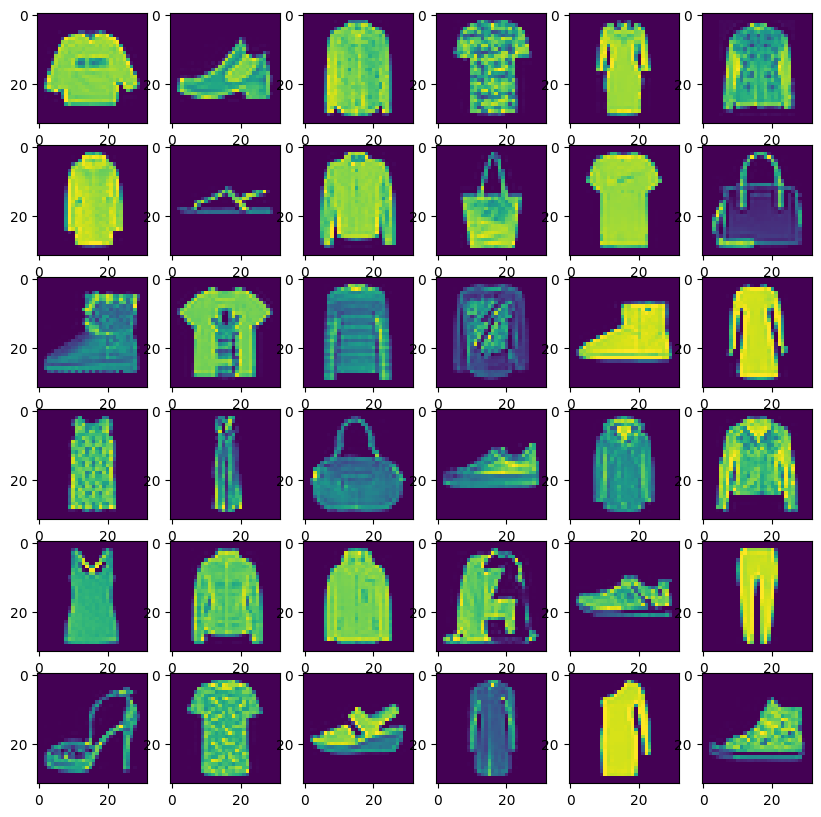

In [16]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(36):
    plt.subplot(6,6,i+1)    # the number of images in the grid is 6*6 (36)
    plt.imshow(X[i])

plt.show()

#Split Training Data Into Training and Validation


In [17]:
seed = 72
img_size_target = 32
tf.random.set_seed(seed)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, shuffle=True, stratify=y, random_state=seed)

In [21]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 56959  columns: (32, 32, 1)
Fashion MNIST valid -  rows: 2998  columns: (32, 32, 1)
Fashion MNIST test -  rows: 2998  columns: (32, 32, 1)


#LeNet-5 Model

it's simple and straightforward architecture. It is a multi-layer convolution neural network for image classification.

 

In [22]:
def scheduler(epoch, lr):
    if epoch < 10:
      return lr
    else:
      return lr * tf.math.exp(-0.1)

In [23]:
def model_builder(hp):

    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(img_size_target, img_size_target, 1)))
    model.add(MaxPooling2D(strides=2))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(strides=2))
    model.add(Flatten())


    hp_units = hp.Choice('units', values=[120, 240])
    model.add(Dense(units=hp_units, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='SparseCategoricalCrossentropy',
                  metrics=['accuracy'])

    return model

# LeNet-5 model With best Hyperparameters

**Modification hyperparameters to get the best performance you can achieve.**


In [24]:
pip install -q -U keras-tuner

In [25]:
import keras_tuner as kt


In [26]:
seed = 72
img_size_target = 32
tf.random.set_seed(seed)

In [27]:
def search(model_builder, X_train, y_train, X_val, y_val):
  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
  lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
  tuner = kt.Hyperband(model_builder, objective='val_accuracy', seed=seed, overwrite=True)
  tuner.search(X_train, y_train, validation_data=(X_val, y_val), batch_size=50, callbacks=[stop_early, lr_scheduler])
  return tuner

In [28]:
tuner = search(model_builder, X_train, y_train, X_val, y_val)

Trial 8 Complete [00h 00m 10s]
val_accuracy: 0.8899266123771667

Best val_accuracy So Far: 0.8899266123771667
Total elapsed time: 00h 02m 02s


In [29]:
# display best hyperparameters found after searching.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
initial_learning_rate = best_hps.get('learning_rate')

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {initial_learning_rate}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 240 and the optimal learning rate for the optimizer
is 0.001.



#Build the model with the optimal hyperparameters.

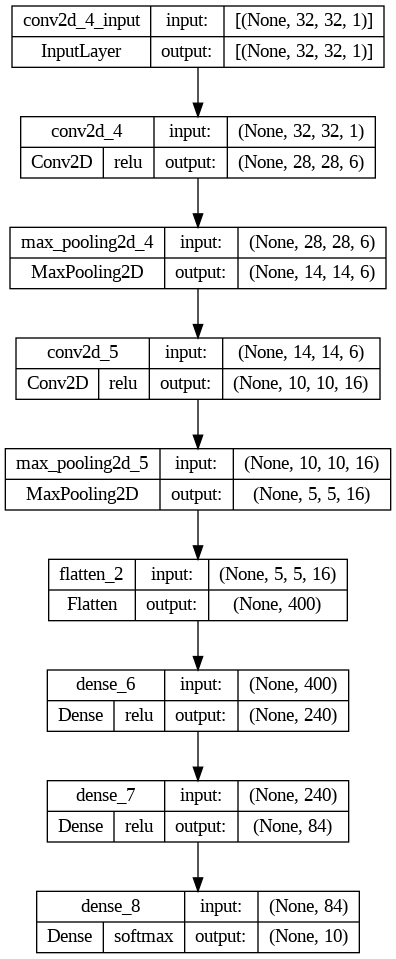

In [31]:
from keras.utils import plot_model

model = tuner.hypermodel.build(best_hps)
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

# Train the LeNet-5 model with best Hyper parameters.

In [32]:
# create general function 
def fit(X_train, y_train, X_val, y_val):
  stop_early = tf.keras.callbacks.EarlyStopping(patience=5)
  lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
  model = tuner.hypermodel.build(best_hps)
  history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val), callbacks=[stop_early, lr_scheduler])
  return history, model

In [33]:
history, _ = fit(X_train, y_train, X_val, y_val)

Epoch 1/20
1140/1140 [==============================] - 5s 4ms/step - loss: 0.5258 - accuracy: 0.8081 - val_loss: 0.4158 - val_accuracy: 0.8489 - lr: 0.0010
Epoch 2/20
1140/1140 [==============================] - 5s 5ms/step - loss: 0.3589 - accuracy: 0.8677 - val_loss: 0.3564 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 3/20
1140/1140 [==============================] - 4s 3ms/step - loss: 0.3138 - accuracy: 0.8848 - val_loss: 0.3325 - val_accuracy: 0.8783 - lr: 0.0010
Epoch 4/20
1140/1140 [==============================] - 4s 4ms/step - loss: 0.2838 - accuracy: 0.8953 - val_loss: 0.3211 - val_accuracy: 0.8806 - lr: 0.0010
Epoch 5/20
1140/1140 [==============================] - 4s 4ms/step - loss: 0.2605 - accuracy: 0.9036 - val_loss: 0.2994 - val_accuracy: 0.8936 - lr: 0.0010
Epoch 6/20
1140/1140 [==============================] - 4s 3ms/step - loss: 0.2391 - accuracy: 0.9107 - val_loss: 0.2939 - val_accuracy: 0.8936 - lr: 0.0010
Epoch 7/20
1140/1140 [==============================] - 4s

In [34]:
# find best epoch
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 11


#Plot graph to compare Accuracy and loss

In [35]:
def display_accuracy(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracies')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [36]:
def display_losses(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Losses')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

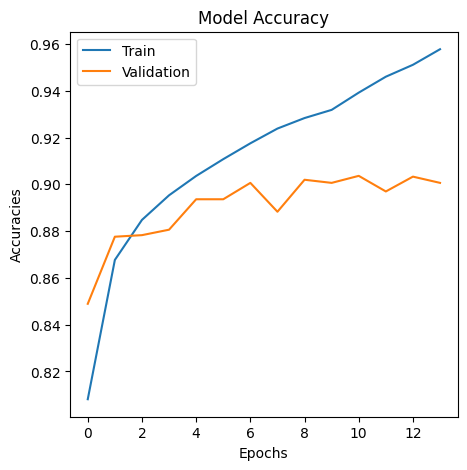

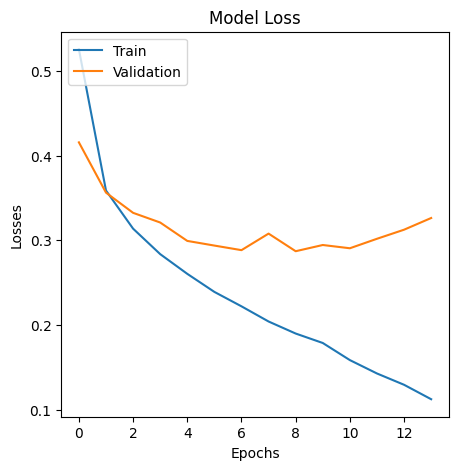

In [37]:
def displayGraphs(history):
  display_accuracy(history)
  print()
  display_losses(history)

displayGraphs(history)

# Evaluate the model Using Test Data

In [41]:
# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model.
loss, accuracy = best_model.evaluate(X_test, y_test)
print("Accuracy of Testing : ",accuracy)
print("Loss Of Testing : ",loss)

1874/1874 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.8954
Accuracy of Testing :  0.8953750133514404
Loss Of Testing :  0.2920973598957062


# Cross-Validation

# use k-fold Cross validation


In [49]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [53]:
fold = 1
models = []
accuracies = []
loss = []
for train, val in kfold.split(X_train, y_train):

  print(f'Start of fold {fold}')
  print()

  # Fit data to new model
  history, model = fit(X_train[train], y_train[train], X_train[val], y_train[val])

  # check model generalization
  scores = model.evaluate(X_test, y_test)
  print(scores)
  print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  models.append(model)
  accuracies.append(scores[1] * 100)
  loss.append(scores[0])

  print()
  print(f'End of fold {fold}')

  # Increase fold number
  fold = fold + 1

Start of fold 1

Epoch 1/20
912/912 [==============================] - 4s 4ms/step - loss: 0.5943 - accuracy: 0.7814 - val_loss: 0.4699 - val_accuracy: 0.8282 - lr: 0.0010
Epoch 2/20
912/912 [==============================] - 4s 5ms/step - loss: 0.3825 - accuracy: 0.8607 - val_loss: 0.3447 - val_accuracy: 0.8763 - lr: 0.0010
Epoch 3/20
912/912 [==============================] - 4s 4ms/step - loss: 0.3342 - accuracy: 0.8771 - val_loss: 0.3419 - val_accuracy: 0.8794 - lr: 0.0010
Epoch 4/20
912/912 [==============================] - 4s 4ms/step - loss: 0.3021 - accuracy: 0.8879 - val_loss: 0.3230 - val_accuracy: 0.8811 - lr: 0.0010
Epoch 5/20
912/912 [==============================] - 4s 4ms/step - loss: 0.2773 - accuracy: 0.8970 - val_loss: 0.2982 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 6/20
912/912 [==============================] - 4s 5ms/step - loss: 0.2585 - accuracy: 0.9044 - val_loss: 0.3080 - val_accuracy: 0.8875 - lr: 0.0010
Epoch 7/20
912/912 [==============================] -

#Plot graph to compare Accuracy and loss

In [57]:
import matplotlib.ticker as mticker

def fold_accuracy(folds, acc):
    plt.figure(figsize=(5,5))
    plt.plot(folds, acc)
    # make axis as discrete values
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title('Model Accuracy')
    plt.ylabel('Acc')
    plt.xlabel('Folds')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [58]:
def fold_loss(folds, loss):
    plt.figure(figsize=(5,5))
    plt.plot(folds, loss)
    # make axis as discrete values
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Folds')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

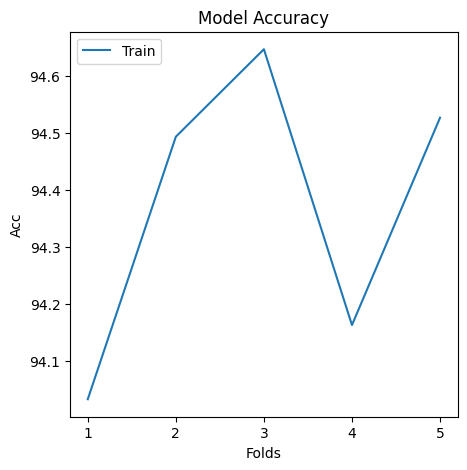

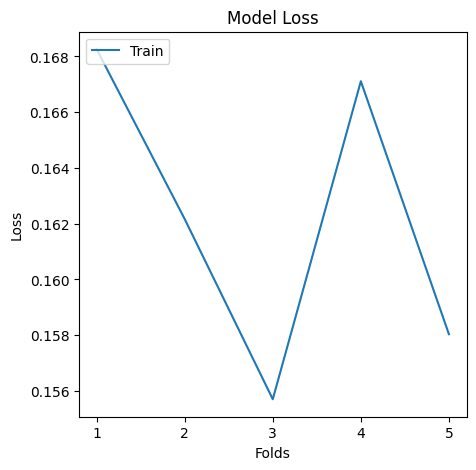

In [60]:
def displayGraphs(history):
  fold_accuracy(range(1, 6), accuracies)
  print()
  fold_loss(range(1,6), loss)
displayGraphs(history)

# `Transfer learning`

We need to resize the MNIST data set. Note that the minimum size actually depends on the ImageNet model. 


# RESNet152V2


# Build RESNet152V2 model

In [76]:
from keras.applications import ResNet152V2

def ResNet():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(img_size_target, img_size_target, 1))
    img_conc = Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = ResNet152V2(weights='imagenet', include_top=False, input_tensor=img_conc)

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    x = Dense(1024, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(512, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                  loss='SparseCategoricalCrossentropy',
                  metrics=['accuracy'])

    return model

# Display RESNet152V2 model

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.524364 to fit



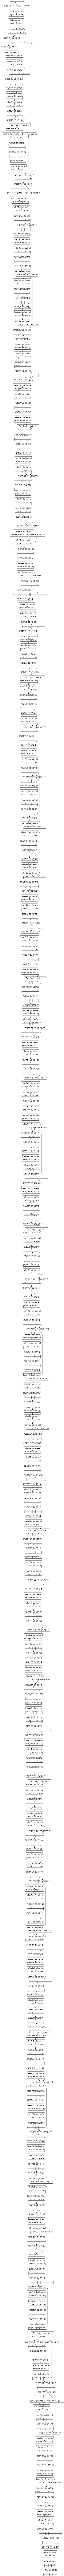

In [77]:
densenet_model = ResNet()
plot_model(densenet_model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [88]:
densenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 32, 32, 3)    0           ['input_2[0][0]',                
                                                                  'input_2[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['concatenate_1[0][0]']          
                                                                                              

# Train RESNet152V2 model

In [78]:
stop_early = tf.keras.callbacks.EarlyStopping(patience=5)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
dense_history = densenet_model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val), callbacks=[stop_early, lr_scheduler])

Epoch 1/20
1140/1140 [==============================] - 53s 37ms/step - loss: 0.8038 - accuracy: 0.7098 - val_loss: 0.6495 - val_accuracy: 0.7622 - lr: 0.0010
Epoch 2/20
1140/1140 [==============================] - 37s 32ms/step - loss: 0.6342 - accuracy: 0.7664 - val_loss: 0.6015 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 3/20
1140/1140 [==============================] - 35s 31ms/step - loss: 0.5931 - accuracy: 0.7807 - val_loss: 0.5904 - val_accuracy: 0.7849 - lr: 0.0010
Epoch 4/20
1140/1140 [==============================] - 37s 33ms/step - loss: 0.5632 - accuracy: 0.7908 - val_loss: 0.5639 - val_accuracy: 0.7912 - lr: 0.0010
Epoch 5/20
1140/1140 [==============================] - 39s 35ms/step - loss: 0.5409 - accuracy: 0.7990 - val_loss: 0.5658 - val_accuracy: 0.7959 - lr: 0.0010
Epoch 6/20
1140/1140 [==============================] - 36s 31ms/step - loss: 0.5198 - accuracy: 0.8057 - val_loss: 0.5638 - val_accuracy: 0.7925 - lr: 0.0010
Epoch 7/20
1140/1140 [========================

# Evaluate RESNet152V2 model Using Test Data

In [79]:
# check model generalization
dense_scores = densenet_model.evaluate(X_test, y_test)
print(dense_scores)
print(f'Score for: {densenet_model.metrics_names[0]} of {dense_scores[0]}; {densenet_model.metrics_names[1]} of {dense_scores[1] * 100}%')

1874/1874 [==============================] - 47s 25ms/step - loss: 0.2998 - accuracy: 0.8896
[0.29984548687934875, 0.8895708322525024]
Score for: loss of 0.29984548687934875; accuracy of 88.95708322525024%


#Plot graph to compare Accuracy and loss

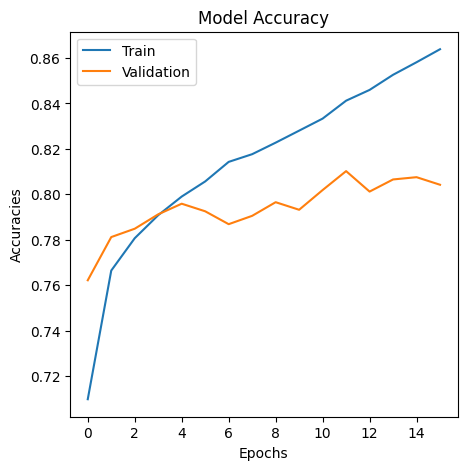

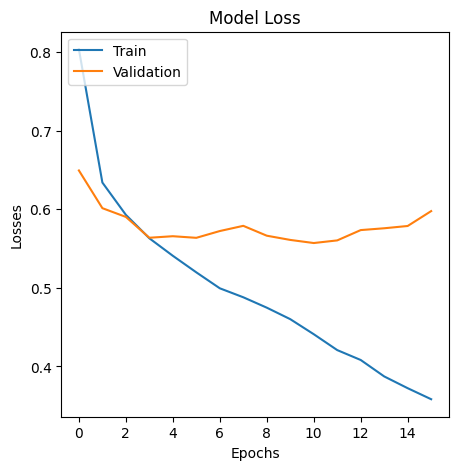

In [89]:
def displayGraphs(history):
  display_accuracy(history)
  print()
  display_losses(history)

displayGraphs(dense_history)

# VGG19

In [81]:
from keras.applications import VGG19

def VGG19_builder():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(img_size_target, img_size_target, 1))
    img_conc = Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = VGG19(weights='imagenet', include_top=False, input_tensor=img_conc)

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    x = Dense(256, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding a dropout layer
    # x = Dropout(0.4)(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                  loss='SparseCategoricalCrossentropy',
                  metrics=['accuracy'])

    return model

#Display VGG19  model

80134624/80134624 [==============================] - 0s 0us/step


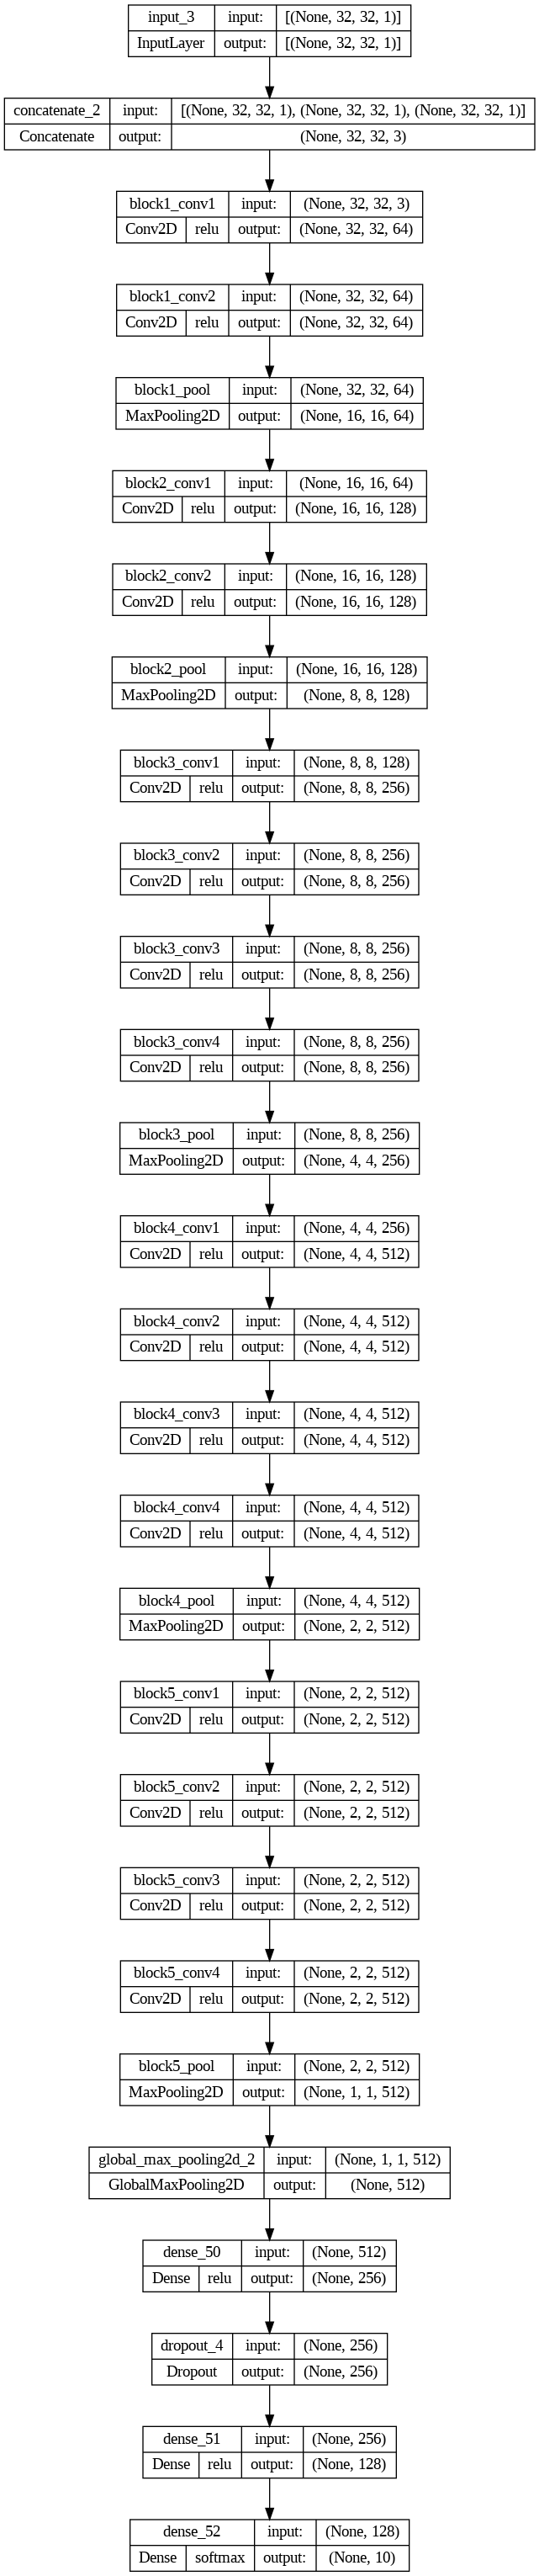

In [82]:
vgg19_model = VGG19_builder()
plot_model(vgg19_model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

# Train VGG19 model

In [83]:
stop_early = tf.keras.callbacks.EarlyStopping(patience=5)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
vgg_history = vgg19_model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val), callbacks=[stop_early, lr_scheduler])

Epoch 1/20
1140/1140 [==============================] - 18s 15ms/step - loss: 0.6258 - accuracy: 0.7752 - val_loss: 0.5029 - val_accuracy: 0.8169 - lr: 0.0010
Epoch 2/20
1140/1140 [==============================] - 17s 15ms/step - loss: 0.4734 - accuracy: 0.8267 - val_loss: 0.4507 - val_accuracy: 0.8382 - lr: 0.0010
Epoch 3/20
1140/1140 [==============================] - 16s 14ms/step - loss: 0.4365 - accuracy: 0.8406 - val_loss: 0.4347 - val_accuracy: 0.8382 - lr: 0.0010
Epoch 4/20
1140/1140 [==============================] - 17s 15ms/step - loss: 0.4189 - accuracy: 0.8472 - val_loss: 0.4142 - val_accuracy: 0.8482 - lr: 0.0010
Epoch 5/20
1140/1140 [==============================] - 16s 14ms/step - loss: 0.4053 - accuracy: 0.8506 - val_loss: 0.4110 - val_accuracy: 0.8569 - lr: 0.0010
Epoch 6/20
1140/1140 [==============================] - 17s 15ms/step - loss: 0.3905 - accuracy: 0.8563 - val_loss: 0.4013 - val_accuracy: 0.8566 - lr: 0.0010
Epoch 7/20
1140/1140 [========================

# Evaluate VGG19 model on test data set

In [84]:
# check model generalization
vgg_scores = vgg19_model.evaluate(X_test, y_test)
print(vgg_scores)
print(f'Score for: {vgg19_model.metrics_names[0]} of {vgg_scores[0]}; {vgg19_model.metrics_names[1]} of {vgg_scores[1] * 100}%')

1874/1874 [==============================] - 20s 10ms/step - loss: 0.2491 - accuracy: 0.9076
[0.24906779825687408, 0.9075670838356018]
Score for: loss of 0.24906779825687408; accuracy of 90.75670838356018%


#Plot graph to compare Accuracy and loss

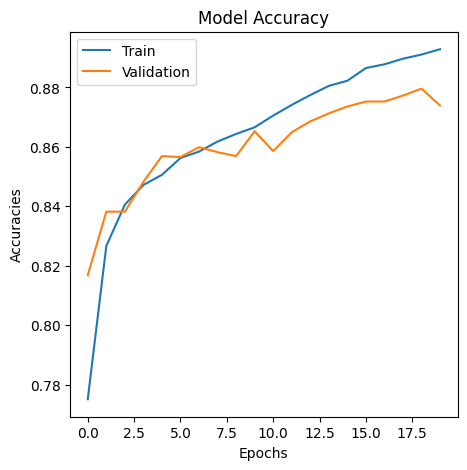

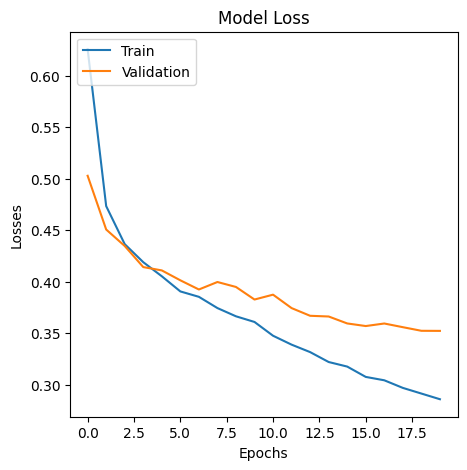

In [90]:
displayGraphs(vgg_history)